<a href="https://colab.research.google.com/github/RMEE-0/ML/blob/main/My_ML_prog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **My first ML program**

## **Data libraries**


First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)

--- Decision Tree Results ---
Accuracy: 0.6948051948051948
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                    

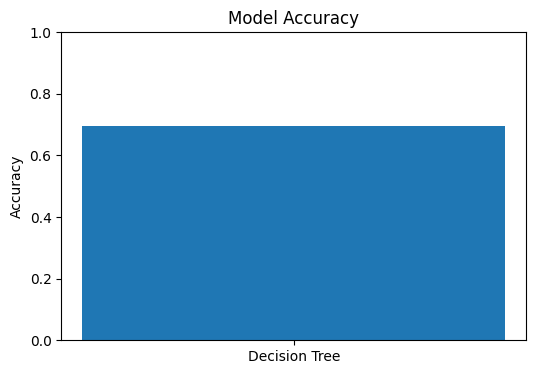

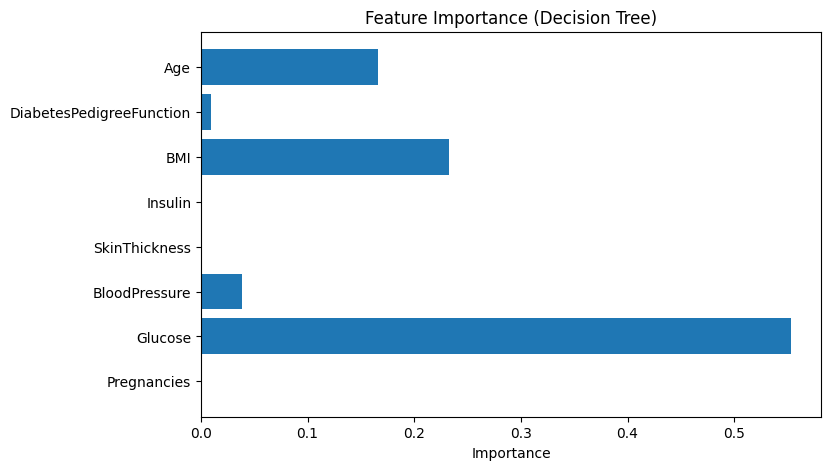

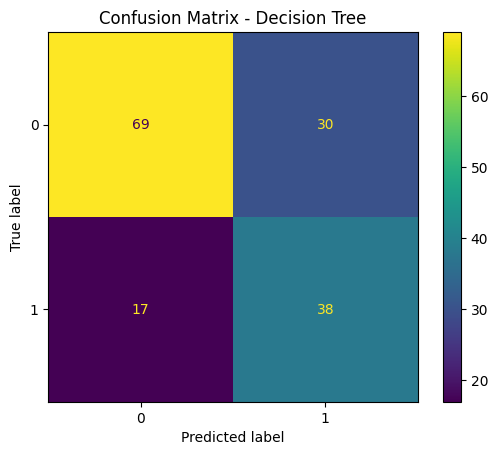

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

print("First 5 rows of data:")
print(data.head())
print("\nDataset shape:", data.shape)

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

accuracy = accuracy_score(y_test, tree_pred)
plt.figure(figsize=(6,4))
plt.bar(['Decision Tree'], [accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

importances = tree_model.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(columns[:-1], importances)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.show()

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title('Confusion Matrix - Decision Tree')
plt.show()
